In [9]:
#梯度检查
import numpy as np

def dice(x,y):
    assert len(x.shape)==len(y.shape)==2
    up=x*y
    andN=np.sum(up,axis=1)
    down=x+y
    orU=np.sum(down,axis=1)
    dice=2*andN/orU
    loss=1-dice
    return np.mean(loss)
def dice_prime(x,y):
    up=x*y
    down=x+y
    N=x.shape[0]
    x_gra=-2*(y*down-up)/(down**2)/N
    y_gra=-2*(x*down-up)/(down**2)/N
    return x_gra,y_gra
def check_gradient(f, x0,y0,epsilon):
    x_gra=(f(x0+epsilon,y0) - f(x0-epsilon,y0))/2/epsilon
    y_gra=(f(x0,y0+epsilon) - f(x0,y0-epsilon))/2/epsilon
    return x_gra,y_gra



In [ ]:
import torch as t

def dice(x,y):
    assert len(x.shape)==len(y.shape)==2
    up=x*y
    andN=np.sum(up,axis=1)
    down=x+y
    orU=np.sum(down,axis=1)
    dice=2*andN/orU
    loss=1-dice
    return np.mean(loss)
def dice_prime(x,y):
    up=x*y
    down=x+y
    N=x.shape[0]
    x_gra=-2*(y*down-up)/(down**2)/N
    y_gra=-2*(x*down-up)/(down**2)/N
    return x_gra,y_gra
def check_gradient(f, x0,y0,epsilon):
    x_gra=(f(x0+epsilon,y0) - f(x0-epsilon,y0))/2/epsilon
    y_gra=(f(x0,y0+epsilon) - f(x0,y0-epsilon))/2/epsilon
    return x_gra,y_gra

In [10]:
from scipy.linalg.misc import norm
a=3
b=3
if __name__ == '__main__':
    x=np.random.random_sample([a,b])
    y=np.random.randint(0,2,a*b).reshape(a,b)
    epsilon = 1e-5*np.random.random_sample([a,b])
    aa,bb=dice_prime(x,y)
           
    cc,dd=check_gradient(dice,x,y,epsilon)
    print aa,bb
    print cc,dd
    print norm(aa-cc)/norm(aa+cc)
          

[[ 0.02678267  0.02678267  0.02678267]
 [-0.34360993 -0.34360993  0.02678267]
 [ 0.02678267  0.02678267 -0.34360993]] [[ 0.00244694 -0.27125917 -0.01919966]
 [ 0.01170563 -0.09570007 -0.13518792]
 [-0.04836803 -0.11194054  0.0197247 ]]
[[ -8.2616272   -0.31801541  -0.51308702]
 [ -0.33723716 -13.62777659  -0.15376037]
 [-33.10749601  -5.53260282  -1.24775525]] [[-14.43726049  -0.55573451  -0.89662373]
 [ -0.58932466 -23.81465003  -0.26869749]
 [-57.85561756  -9.66826825  -2.18046242]]
0.994312009809


In [32]:
#梯度检查
import numpy as np
import torch as t
def t_dece(tx,ty):
    andN = 2 * (t.sum((tx * ty)))
    orU1 = t.sum(tx )
    orU2 = t.sum(ty )
    dices =  andN / (orU1 + orU2 )
    losses = 1 - dices
    return losses.mean()
def dice(x,y):
    assert len(x.shape)==len(y.shape)==2
    sums=x.sum()+y.sum()+0.000000001
    dice=(2.*(x*y).sum()+0.000000001)/sums
    
    return 1-dice
def dice_prime(x,y):
    sums=x.sum()+y.sum()+0.000000001
    dice=(2.*(x*y).sum()+0.000000001)/sums
    x_gra=(-2.*y+dice)/sums
    y_gra=(-2.*x+dice)/sums
    return x_gra,y_gra
def check_gradient(f, x0,y0,epsilon):
    
    y_gra=(f(x0,y0+epsilon) - f(x0,y0-epsilon))/2/epsilon
    return x_gra,y_gra



In [ ]:
#梯度检查
import numpy as np
import torch as t
def t_dice(tx,ty):
    andN = 2 * (t.sum((tx * ty),axis=1))
    orU1 = t.sum(tx ,axis=1)
    orU2 = t.sum(ty ,axis=1)
    dices =  andN / (orU1 + orU2 )
    losses = 1 - dices
    return losses.mean()
def numpy_dice(tx,ty):
    andN=2*np.sum(tx*ty,axis=1)
    orU1=np.sum(tx,axis=1)
    orU2=np.sum(ty,axis=1)
    dices =  andN / (orU1 + orU2 )
    losses = 1 - dices
    return losses.mean()

In [1]:
tx=np.random.rand_sample(16,6)
ty=np.random.rand_sample(16,6)

NameError: name 'np' is not defined

In [41]:
f=dice
x0=tx.data.numpy()
y0=ty.data.numpy()
epsilon=eps.numpy()

In [42]:
x_gra=(f(x0+epsilon,y0) - f(x0-epsilon,y0))

In [45]:
f(x0+epsilon,y0), f(x0-epsilon,y0)

(0.36794207755484021, 0.36794216284545167)

In [43]:
x_gra

-8.5290611462340848e-08

In [46]:
eps=0.0000001*t.Tensor([[1,0,0]]).t().contiguous()

In [47]:
check_gradient(dice,tx.data.numpy(),ty.data.numpy(),eps.numpy())

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in divide


(array([[ 0.07652896],
        [        inf],
        [        inf]], dtype=float32), array([[ 0.36628449],
        [        inf],
        [        inf]], dtype=float32))

In [33]:
x = t.Tensor(3,1).uniform_() 
x
y=t.Tensor([[1,1,0]]).t().contiguous()

In [34]:
tx=t.autograd.Variable((x),requires_grad=True)
ty=t.autograd.Variable((y),requires_grad=True)
loss = t_dece(tx,ty)
loss.backward()
tx.grad,ty.grad

(Variable containing:
 -0.3325
 -0.3325
  0.1536
 [torch.FloatTensor of size 3x1], Variable containing:
 -0.0059
 -0.3189
 -0.2421
 [torch.FloatTensor of size 3x1])

In [35]:
dice(tx.data.numpy(),ty.data.numpy())

0.36794219345703916

In [36]:
loss

Variable containing:
 0.3679
[torch.FloatTensor of size 1]

In [37]:
dice_prime(tx.data.numpy(),ty.data.numpy())

(array([[-0.33249822],
        [-0.33249822],
        [ 0.15363082]], dtype=float32), array([[-0.00587533],
        [-0.31892082],
        [-0.24205311]], dtype=float32))

In [ ]:
self.sum=bottom[0].data.sum()+bottom[1].data.sum()+1.
self.dice=(2.* (bottom[0].data * bottom [1].data).sum()+1.)/self.sum
        top[0].data[...] = 1.- self.dice
        
        bottom[0].diff[...] = (-2.*self.diff+self.dice)/self.sum

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [43]:
probs=np.load("LKDS-00004_probs.npy")
print probs.shape

(325, 512, 512)


[]


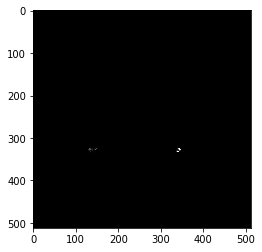

In [62]:
print np.where(probs==1)[0]
plt.imshow(probs[140],cmap='gray')

In [35]:
from data.util import load_ct
image,origin,spa=load_ct("/home/x/data/datasets/tianchi/train/LKDS-00004.mhd")

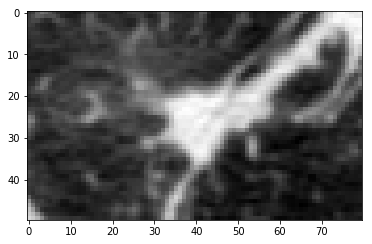

In [41]:
plt.imshow(image[144,300:350,110:190],cmap='gray')

In [61]:
probs[140,325:328,140:160].max()

0.31823441

In [48]:
probs[125:157,307:339,137:169]

array([[[  1.32458217e-06,   8.57038231e-07,   1.01338082e-06, ...,
           1.11204372e-06,   8.45222871e-07,   2.04394905e-06],
        [  4.95372433e-07,   1.09796974e-06,   1.04932951e-06, ...,
           1.23419215e-06,   1.14176487e-06,   1.69734153e-06],
        [  1.49780215e-06,   1.51994357e-06,   1.73428657e-06, ...,
           1.86574073e-06,   3.74025973e-07,   2.33323226e-06],
        ..., 
        [  3.88743899e-07,   1.10578071e-06,   2.34186075e-07, ...,
           1.28466274e-06,   7.26825078e-07,   1.00583986e-06],
        [  5.44768341e-07,   7.01666522e-07,   1.80418306e-06, ...,
           1.25404358e-06,   1.09454845e-06,   9.49453920e-07],
        [  8.10764277e-07,   1.83759971e-06,   3.51295569e-07, ...,
           6.99604129e-07,   9.25472534e-07,   1.32513617e-06]],

       [[  1.50299661e-06,   1.19780498e-06,   5.97580595e-07, ...,
           4.18002855e-07,   1.34710774e-07,   5.73894852e-07],
        [  7.34482569e-07,   4.44967827e-06,   1.46227683e-0

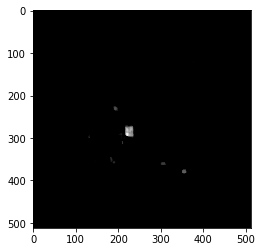

In [27]:
plt.imshow(probs.sum(axis=0),cmap='gray')

In [6]:
from data.util import select,voxel_2_world,world_2_voxel,load_ct_info

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [28]:
file_name="LKDS-00004"
reals=select(file_name)
print reals

      seriesuid     coordX      coordY      coordZ  diameter_mm
304  LKDS-00004 -68.270833  209.412809  167.229885     22.51748


In [29]:
arr=[]
for index,row in reals.iterrows():
    arr.append(np.array([row["coordX"],row["coordY"],row["coordZ"]]))
print arr
print world_2_voxel(arr,file_name)

[array([ -68.27083333,  209.41280896,  167.22988506])]
[[ 154.66661272  323.89519614  144.22988506]]


In [42]:
size,origin,spacing=load_ct_info("/home/x/data/datasets/tianchi/train/"+file_name+".mhd")
print origin[::-1],spacing[::-1]#Z,Y,X
22.51748/np.array(spacing[::-1])

[-174.  -12.   23.] [ 0.68359399  0.68359399  1.        ]


array([ 32.93984497,  32.93984497,  22.51748   ])

In [31]:
(np.array(arr)-origin[::-1])/spacing[::-1]

array([[ 154.66661272,  323.89519614,  144.22988506]])

In [13]:
from skimage import color, data, measure, morphology, segmentation

In [14]:
labels = measure.label(probs,connectivity=2)
regions = measure.regionprops(labels)
centers = []
crops = []
bboxes = []
spans=[]
for prop in regions:
    B = prop.bbox
    if B[3]-B[0]>2 and B[4]-B[1]>4 and B[5]-B[2]>4:
        z=int((B[3]+B[0])/2.0)
        y=int((B[4]+B[1])/2.0)
        x=int((B[5]+B[2])/2.0)
        span=np.array([int(B[3]-B[0]),int(B[4]-B[1]),int(B[5]-B[2])])
        spans.append(span)
        centers.append(np.array([z,y,x]))
        bboxes.append(B)

In [15]:
centers

[array([ 32, 485, 369]),
 array([ 36, 497, 222]),
 array([ 34, 487, 348]),
 array([ 37, 490, 277]),
 array([ 49, 361, 289]),
 array([127, 421,  62]),
 array([165, 499, 261]),
 array([171, 425,  85]),
 array([202, 501, 256]),
 array([217, 347, 213])]

In [125]:
import pandas as pd
pdd=pd.read_csv("/home/x/dcsb/Tianchi_pytorch/csv/annotations.csv")
pdd[pdd['seriesuid']==file_name]

,seriesuid,coordX,coordY,coordZ,diameter_mm
628,LKDS-00052,29.438147,63.496942,-196.670914,5.209168
629,LKDS-00052,-100.509793,29.321020,-97.178042,5.062185
630,LKDS-00052,-119.283954,-23.223688,-110.817716,8.679782
631,LKDS-00052,-89.668593,34.299059,-128.560248,23.483745
632,LKDS-00052,-75.732970,35.285004,-185.380144,4.181188
633,LKDS-00052,-126.162566,-0.397681,-213.322709,4.762203
